# Adding Regression Lines to Pandas Plots with SciPy

## Regression can be used to predict the future or to identify trends and relationships in data

In [86]:
import pandas as pd
from scipy import stats

In [87]:
"""
G7data = gdpdata[(gdpdata['MEASURE']=='VIXOBSA') 
        & (gdpdata['Country']=='G7')]
        
G7data=G7data[['Period','Value']]
G7data.to_csv('g7datamore.csv')
"""

"\nG7data = gdpdata[(gdpdata['MEASURE']=='VIXOBSA') \n        & (gdpdata['Country']=='G7')]\n        \nG7data=G7data[['Period','Value']]\nG7data.to_csv('g7datamore.csv')\n"

In [88]:
G7data = pd.read_csv('g7datamore.csv')


In [89]:
G7data.tail()

,Period,Value
63,Q4-2022,NaN
64,Q1-2023,NaN
65,Q2-2023,NaN
66,Q3-2023,NaN
67,Q4-2023,NaN


In [90]:
def formyr(x,data):
    d = data['Period'].values[x]
    y= int(d[-4:])+int(d[1:2])*0.25 - 2007
    return y   

yr=[formyr(x,G7data) for x in range(len(G7data)) ]
G7data['yr'] = yr
G7data


,Period,Value,yr
0,Q1-2007,92.4,0.25
1,Q2-2007,92.9,0.50
2,Q3-2007,93.2,0.75
3,Q4-2007,93.6,1.00
4,Q1-2008,93.7,1.25
...,...,...,...
63,Q4-2022,NaN,16.00
64,Q1-2023,NaN,16.25
65,Q2-2023,NaN,16.50
66,Q3-2023,NaN,16.75


<AxesSubplot:xlabel='Period', ylabel='Value'>

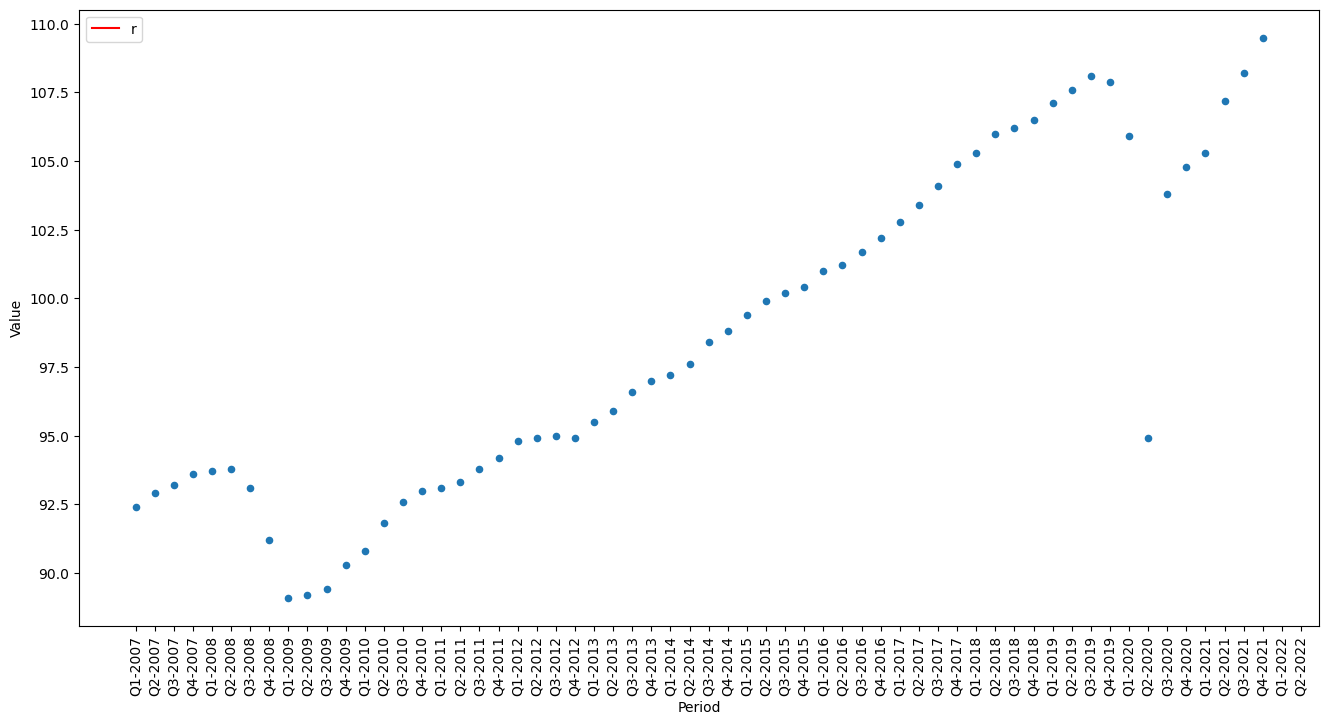

In [91]:
x = G7data['yr']
y = G7data['Value']

m = stats.linregress(x, y)

t = [m.slope * i + m.intercept for i in x]
G7data.insert(len(G7data.columns),'r',t)

ax = G7data.plot.scatter(x='Period',
                         y='Value')
G7data.plot.line(x='Period',
                 y='r', 
                 color='red', 
                 ax=ax, 
                 figsize = (16,8), 
                 rot=90)

#G7data


,Period,Value,yr,r,r2
0,Q1-2007,92.4,0.25,NaN,86.177087
1,Q2-2007,92.9,0.50,NaN,86.580826
2,Q3-2007,93.2,0.75,NaN,86.984565
3,Q4-2007,93.6,1.00,NaN,87.388304
4,Q1-2008,93.7,1.25,NaN,87.792043
...,...,...,...,...,...
63,Q4-2022,NaN,16.00,NaN,111.612652
64,Q1-2023,NaN,16.25,NaN,112.016391
65,Q2-2023,NaN,16.50,NaN,112.420130
66,Q3-2023,NaN,16.75,NaN,112.823870


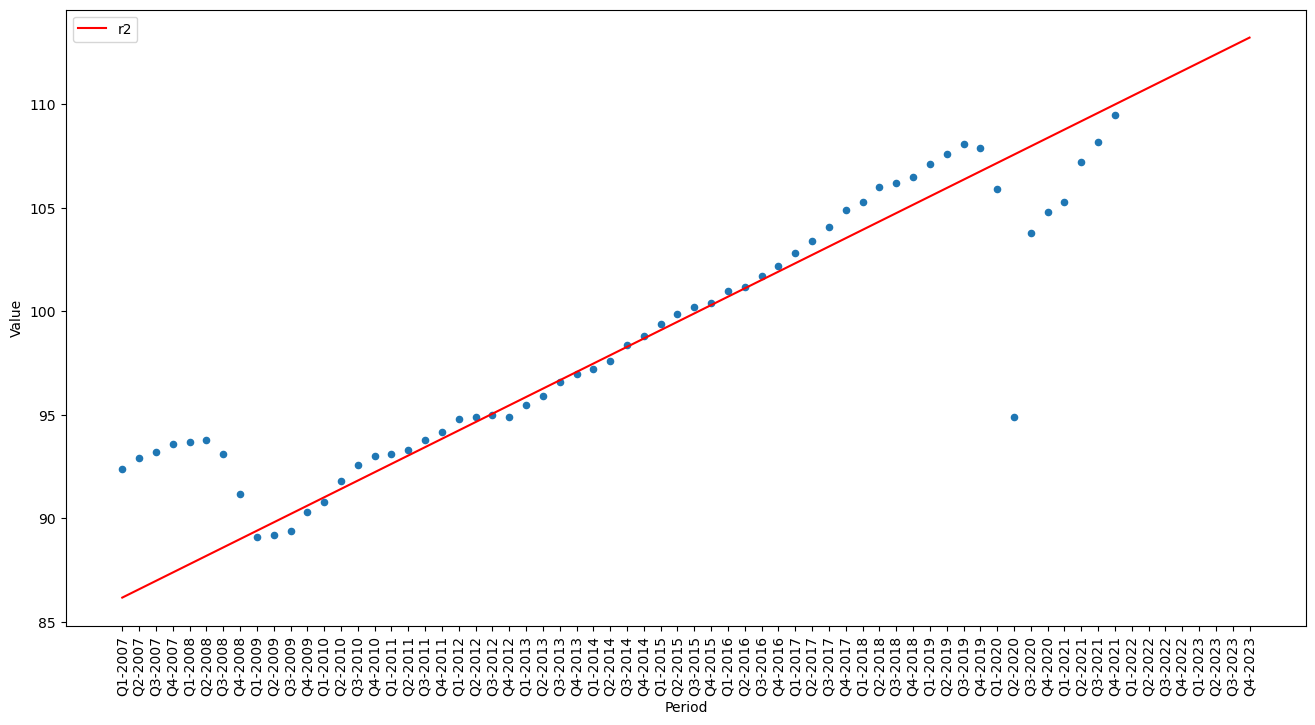

In [92]:
G7data2009 = G7data[(G7data['yr']>2) & (G7data['yr']<=8)]


x = G7data2009['yr']
y = G7data2009['Value']

m = stats.linregress(x, y)

t = [m.slope * i + m.intercept for i in G7data['yr']]

G7data.insert(len(G7data.columns),'r2',t)

ax = G7data.plot.scatter(x='Period',
                         y='Value')
ax = G7data.plot.line(x='Period',
                      y='r2', 
                      color='red', 
                      ax=ax, 
                      figsize = (16,8), 
                      rot=90)

# trained on intervening years, the model does a pretty good job of predicting up
# Q1 2021 
# 2 things - the model is useful for predicting under normal circumstances
# - but random events happen in real life that cannot be predictded

G7data
